In [1]:
import pandas as pd # A tool we'll use to download and preview CSV files
import pprint # A tool to pretty print dictionary outputs
pp = pprint.PrettyPrinter(indent=2)

### Analyzing Cloud Spend Data

- Look for anomalies that impact cloud costs

In [2]:
import creds
api_key = creds.apiKey

In [3]:
from realityengines.client import ReClient
client = ReClient(api_key)

In [4]:
client.list_use_cases()

[UseCase(use_case='CUSTOMER_CHURN', pretty_name='Customer Churn Prediction', description='Identify customers who are most likely to churn out of your system and send them marketing promotions/emails to retain them. Deploy a deep learning, real-time model that identifies customers who are most likely to leave and increase retention.'),
 UseCase(use_case='ENERGY', pretty_name='Real-Time Forecasting', description='Accurately forecast energy or computation usage in real-time. Make downstream planning decision based on your predictions. We use generative modeling and deep learning to augment your dataset with synthetic data. This unique approach allows us to make accurate predictions in real-time, even when you have little historical data.'),
 UseCase(use_case='FINANCIAL_METRICS', pretty_name='Financial Metrics Forecasting', description='Accurately plan your cash flow, revenue and sales with state-of-the-art deep learning-based forecasting. We use generative modeling and deep learning to au

In [5]:
use_case = 'OPERATIONS_INCIDENT'

In [6]:
for requirement in client.describe_use_case_requirements(use_case):
  pp.pprint(requirement.to_dict())

{ 'allowed_column_mappings': { 'DATE': { 'description': 'Date (day, year or '
                                                        'month) that '
                                                        'corresponds to the '
                                                        'value of the metric',
                                         'required': True},
                               'IGNORE': { 'description': 'Ignore this column '
                                                          'in training',
                                           'multiple': True},
                               'ITEM_ID': { 'description': 'The name of the '
                                                           'item that you are '
                                                           'trying to identify '
                                                           'anomalies for.',
                                            'required': True}},
  'dataset_type': 'TIMESERIES',
  'desc

In [7]:
anomaly_project = client.create_project(name='Cloud Spend', use_case=use_case)
anomaly_project.to_dict()

{'project_id': '1083701a90',
 'name': 'Cloud Spend',
 'use_case': 'OPERATIONS_INCIDENT',
 'created_at': '2020-04-23T18:31:36+00:00'}

In [8]:
cloud_spend = pd.read_csv('https://static.realityengines.ai/example_datasets/anomaly_detection/cloud_spend.csv')
cloud_spend.to_csv('cloud_spend.csv', index=False)
cloud_spend

,UsageStartDate,service,BlendedCost
0,2019-01-01 00:00:00+00:00,AmazonEC2,2613.925373
1,2019-01-01 00:00:00+00:00,AmazonRDS,1331.717790
2,2019-01-01 01:00:00+00:00,AmazonEC2,2565.437227
3,2019-01-01 01:00:00+00:00,AmazonRDS,1326.466107
4,2019-01-01 02:00:00+00:00,AmazonEC2,2508.480143
5,2019-01-01 02:00:00+00:00,AmazonRDS,1315.315058
6,2019-01-01 03:00:00+00:00,AmazonEC2,2528.210396
7,2019-01-01 03:00:00+00:00,AmazonRDS,1322.860720
8,2019-01-01 04:00:00+00:00,AmazonEC2,2452.241260
9,2019-01-01 04:00:00+00:00,AmazonRDS,1301.132268


In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
ax = plt.gca()
cloud_spend.set_index(['UsageStartDate', 'service']).unstack().plot(ax=ax)
plt.title('Cloud Spend')

Text(0.5, 1.0, 'Cloud Spend')

In [10]:
# Upload the datasets to RealityEngines.AI
cloud_spend_upload = client.create_dataset_from_local_file('Cloud Spend', 
                                                      project_id=anomaly_project.project_id, 
                                                      dataset_type='TIMESERIES')
with open('cloud_spend.csv') as file:
   cloud_spend_dataset = cloud_spend_upload.upload_file(file)
   print("Cloud Spend Dataset Uploaded")

datasets = [cloud_spend_dataset]

Cloud Spend Dataset Uploaded


In [11]:
for dataset in datasets:
    dataset.wait_for_inspection()
    print(f'{dataset.name} Schema:')
    pp.pprint(client.get_schema(anomaly_project.project_id, dataset.dataset_id))

Cloud Spend Schema:
[ Schema(name='UsageStartDate', column_mapping=None, column_data_type='TIMESTAMP'),
  Schema(name='service', column_mapping=None, column_data_type='CATEGORICAL'),
  Schema(name='BlendedCost', column_mapping=None, column_data_type='NUMERICAL')]


In [12]:
client.describe_use_case_requirements(use_case)[0].allowed_column_mappings

{'ITEM_ID': {'description': 'The name of the item that you are trying to identify anomalies for.',
  'required': True},
 'DATE': {'description': 'Date (day, year or month) that corresponds to the value of the metric',
  'required': True},
 'IGNORE': {'description': 'Ignore this column in training', 'multiple': True}}

In [13]:
client.set_column_mapping(project_id=anomaly_project.project_id, dataset_id=cloud_spend_dataset.dataset_id,
                          column='UsageStartDate', column_mapping='DATE')
client.set_column_mapping(project_id=anomaly_project.project_id, dataset_id=cloud_spend_dataset.dataset_id,
                          column='service', column_mapping='ITEM_ID')

[Schema(name='UsageStartDate', column_mapping='DATE', column_data_type='TIMESTAMP'),
 Schema(name='service', column_mapping='ITEM_ID', column_data_type='IDENTIFIER'),
 Schema(name='BlendedCost', column_mapping=None, column_data_type='NUMERICAL')]

### Train a model

In [14]:
anomaly_project.validate()

ProjectValidation(valid=True, dataset_errors=[])

In [15]:
anomaly_project.get_training_config_options()

[TrainingConfigOptions(name='TEST_SPLIT', data_type='INTEGER', value=None, default=10, options={'range': [5, 20]}, description='Percent of dataset to use for test data. We support using a range between 5% to 20% of your dataset to use as test data.', required=None, last_model_value=None),
 TrainingConfigOptions(name='DROPOUT_RATE', data_type='INTEGER', value=None, default=None, options={'range': [1, 10]}, description='Dropout percentage rate.', required=None, last_model_value=None),
 TrainingConfigOptions(name='BATCH_SIZE', data_type='ENUM', value=None, default=None, options={'values': [16, 32, 64, 128]}, description='Batch size.', required=None, last_model_value=None)]

In [16]:
anomaly_model = anomaly_project.train_model()
anomaly_model.to_dict()

{'name': 'Cloud Spend Model',
 'model_id': '3135fb7ea',
 'model_config': {},
 'created_at': '2020-04-23T18:33:10+00:00',
 'project_id': '1083701a90',
 'latest_model_instance': {'model_instance_id': '13e4f5dd9f',
  'status': 'PENDING',
  'model_id': '3135fb7ea',
  'training_started_at': '2020-04-23T18:33:10+00:00',
  'training_completed_at': None}}

In [17]:
ReClient().predict(
    deployment_id='ff1cd1873',
    deployment_token='afe281dae58b42aca2ac1dfc95d2721d',
    threshold=0.0,
    data={},
    skip_histogram=False
)

{'threshold': 0.0,
 'items': [{'service': 'AmazonRDS',
   'anomalies': [{'BlendedCost': 1195.7161865234375,
     'UsageStartDate': 1566248400.0,
     'anomaly_score': 0.04594091652713274},
    {'BlendedCost': 1134.8544921875,
     'UsageStartDate': 1566252000.0,
     'anomaly_score': 0.022192219874172758},
    {'BlendedCost': 1372.1475830078125,
     'UsageStartDate': 1566255600.0,
     'anomaly_score': 0.1480115906699178},
    {'BlendedCost': 1111.620849609375,
     'UsageStartDate': 1566259200.0,
     'anomaly_score': 0.05474739068016232},
    {'BlendedCost': 1143.6689453125,
     'UsageStartDate': 1566262800.0,
     'anomaly_score': 0.016656163372698707},
    {'BlendedCost': 1120.6043701171875,
     'UsageStartDate': 1566266400.0,
     'anomaly_score': 0.09510535964697273},
    {'BlendedCost': 1096.8543701171875,
     'UsageStartDate': 1566270000.0,
     'anomaly_score': 0.059243715642960784},
    {'BlendedCost': 1129.6923828125,
     'UsageStartDate': 1566273600.0,
     'anomaly_sc

In [18]:
anomaly_model.wait_for_evaluation() #takes a long time

Model(name='Cloud Spend Model', model_id='3135fb7ea', model_config={}, created_at='2020-04-23T18:33:10+00:00', project_id='1083701a90', latest_model_instance=ModelInstance(model_instance_id='13e4f5dd9f', status='COMPLETE', model_id='3135fb7ea', training_started_at='2020-04-23T18:33:10+00:00', training_completed_at='2020-04-23T18:44:18+00:00'))

In [19]:
pp.pprint(anomaly_model.get_metrics().to_dict())

{ 'metric_names': [ {'mean': 'Mean of Reconstruction Error'},
                    {'std': 'Std of Reconstruction Error'}],
  'metrics': {'mean': 0.10230272143539164, 'std': 0.117024928316964},
  'model_id': '3135fb7ea',
  'model_instance_id': '13e4f5dd9f'}


In [20]:
anomaly_deployment = anomaly_model.create_deployment('Anomaly Detection Deployment')
anomaly_deployment.wait_for_deployment()

Deployment(deployment_id='29efe83e', name='Anomaly Detection Deployment', status='ACTIVE', description='', deployment_config=None, deployed_at='2020-04-23T18:49:25+00:00', created_at='2020-04-23T18:49:25+00:00', project_id='1083701a90', model_id='3135fb7ea')

In [21]:
deployment_token = anomaly_project.create_deployment_token().deployment_token
deployment_token

'102f5013798347a59c13b25fbcaf1c9c'

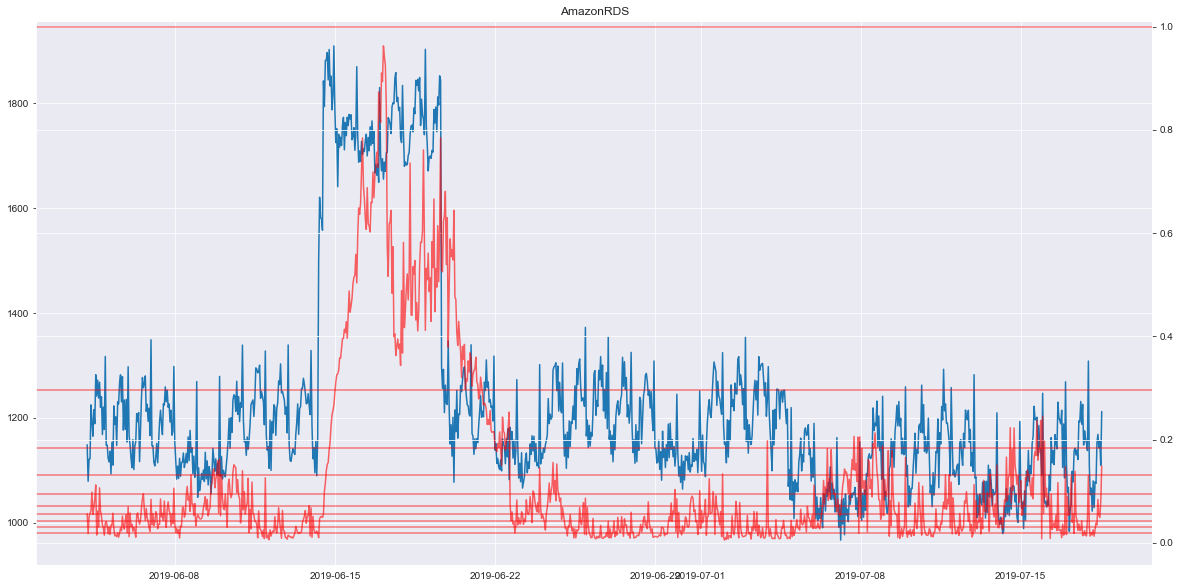

In [24]:
# Visualize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

minstart = 1548100800
maxend = 1567292400

index = 0
window = 3

window_size = (maxend - minstart) / 5

start = minstart+(window_size*window)
end = minstart+(window_size*(window+1))

res = ReClient().predict(
    deployment_id='ff1cd1873',
    deployment_token='afe281dae58b42aca2ac1dfc95d2721d',
    threshold=0.0,
    start_timestamp=start,
    end_timestamp=end,
    data={},
    skip_histogram=False
)

# print(res['histogram'])

item = res['items'][index]

y = [x['BlendedCost'] for x in item['anomalies']]
t = [pd.Timestamp(float(x['UsageStartDate']), unit='s') for x in item['anomalies']]
a = [x['anomaly_score'] for x in item['anomalies']]

fig = plt.figure(figsize=(20,10))
plt.plot(t,y)
plt.title(item['service'])
ax2 = plt.gca().twinx()
ax2.plot(t,a, color='red', alpha=0.6)
for x in res['histogram']:
    ax2.axhline(x['label'], color='red', alpha=0.5)